# Different Social Distancing Transmission Rate: $\beta_n/\beta_d = 10$
## Objective
This notebook is dedicated to understand how social distancing will effect the spread of an epidemic.
## Setup

In [1]:
using DifferentialEquations, Plots, Plots.PlotMeasures
pyplot()

Plots.PyPlotBackend()

## Utility functions

In [2]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=10mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont = font(s-4, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts, td) = if (t-ts<0 || t-ts-td>0) 0 else 1 end

sinput (generic function with 1 method)

# $SIR$ Model

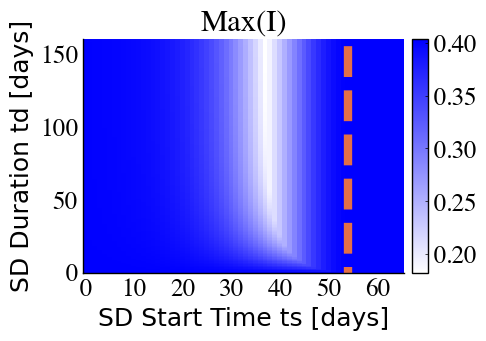

In [3]:
# model description
function SIR(dx,x,p,t)
    b, db, g, t0, T = p
    u = b - db.*sinput(t, t0, T)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

beta, bdiff, gamma = [0.2,0.18,0.05]

# define initial values
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0, 0]

# ode solver
alg = BS3()

# range of the quarantine starting time and duration
Trng = 0:160
trng = 0:65
data = zeros(size(Trng,1), size(trng,1))
time = data

# define initial values
u0 = [1-1e-3, 1e-3, 0.]
tspan = (0.0, 1e3)

p[4:5] = [0, 0]
prob  = ODEProblem(SIR, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8, saveat=0.1)
timen = sol.t[argmax(sol[2,:])]

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[4:5] = [trng[j], Trng[i]]
        prob = ODEProblem(SIR, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8, saveat=0.1)
        data[i,j] = maximum(sol[2,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, 
    linewidth=6, legend=:false)
p1 = bplot(p1, 22)
savefig(p1, "figures/SIR_heatmap2.png")
savefig(p1, "figures/SIR_heatmap2.svg")

# $SAIR$ Model

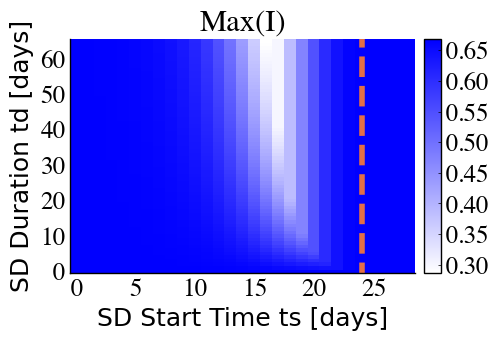

In [4]:
# model description
function SAIR(dx,x,p,t)
    b1, db1, b2, db2, nu, al, g, t0, T = p
    u1 = b1 - db1.*sinput(t, t0, T)
    u2 = b2 - db2.*sinput(t, t0, T)
    dx[1] = -u1*x[1]*x[2] - u2*x[1]*x[3]
    dx[2] = u1*x[1]*x[2] - (al+nu)*x[2]
    dx[3] = u2*x[1]*x[3] + nu*x[2]- g*x[3]
    dx[4] = al*x[2] + g*x[3]
end


# define initial values
u0 = [1-11e-4, 1e-3, 1e-4, 0.]
p  = [0.3, 0.15, 0.5, 0.45, 0.1, 0.5, 0.05, 15, 40]

# ode solver
alg = BS3()
Trng = 0:65
trng = 0:28
data = zeros(size(Trng,1), size(trng,1))
time = data

tspan = (0.0, 1e3)

p[8:9] = [0, 0]
prob  = ODEProblem(SAIR, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8, saveat=0.1)
timen = sol.t[argmax(sol[3,:])]

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[8:9] = [trng[j], Trng[i]]
        prob = ODEProblem(SAIR, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8, saveat=0.1)
        data[i,j] = maximum(sol[3,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, 
    linewidth=4, legend=:false)
p1 = bplot(p1, 22)
savefig(p1, "figures/SAIR_heatmap2.png")
savefig(p1, "figures/SAIR_heatmap2.svg")

# $fSIR$ Model

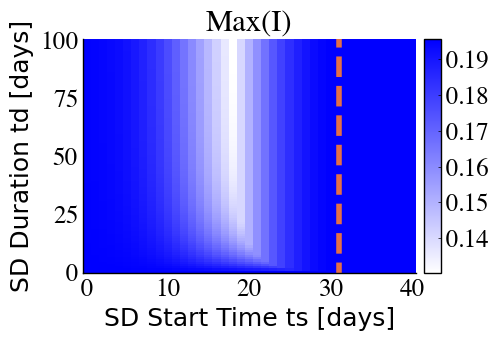

In [5]:
# model description
function fSIR(dx,x,p,t)
    b, db, g, t0, T = p
    k = 10
    u = b - db.*sinput(t, t0, T)
    dx[1] = -u*x[1]*x[2]/(1+k*x[2])
    dx[2] = u*x[1]*x[2]/(1+k*x[2]) - g*x[2]
    dx[3] = g*x[2]
end

beta, bdiff, gamma = [0.5,0.45,0.09]
    
# define initial values
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 15, 40]

# ode solver
alg = BS3()

p[4:5] = [0, 0]
prob  = ODEProblem(fSIR, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sol[2,:])]

Trng = 0:100
trng = 0:40
data = zeros(size(Trng,1), size(trng,1))
time = data

# define initial values
u0 = [0.999, 0.001, 0.]
tspan = (0.0, 1e3)

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[4:5] = [trng[j], Trng[i]]
        prob = ODEProblem(fSIR, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8, saveat=0.1)
        data[i,j] = maximum(sol[2,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, 
    linewidth=4, legend=:false)
p1 = bplot(p1, 22)
savefig(p1, "figures/fSIR_heatmap2.png")
savefig(p1, "figures/fSIR_heatmap2.svg")

# 6 Compartment $SIR$ Model

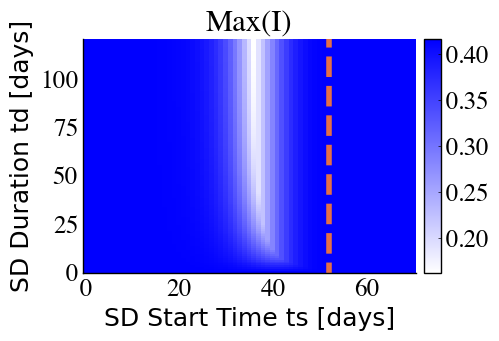

In [6]:
# 6 Compartment SIR model
function ETAL(du,u,p,t)
    ba, ea, es, bi, h, gai, gir, f, d, tc, T = p
    inp1 = ba - 0.9*ba.*sinput(t, tc, T)
    inp2 = bi - 0.9*bi.*sinput(t, tc, T)
    h2 = h
    h1 = 1/(1+10*h2)
    du[1] = -es*inp2*u[1]*u[5] - es*inp1*(u[4]+ea*u[3])*u[1] - h1*u[1] + h2*u[2]
    du[2] = -inp2*u[2]*u[5] - inp1*(u[4]+ea*u[3])*u[2] + h1*u[1] - h2*u[2] 
    du[3] = es*inp2*u[1]*u[5] + es*inp1*(u[4]+ea*u[3])*u[1] + h2*u[4] - gai*u[3] - h1*u[3]
    du[4] = inp2*u[2]*u[5] + inp1*(u[4]+ea*u[3])*u[2] + h1*u[3] - gai*u[4] - h2*u[4]
    du[5] = f*gai*(u[3]+u[4]) - d*u[5] - gir*u[5]
    du[6] = (1-f)*gai*(u[3]+u[4]) + gir*u[5]
end

p  = [0.385, 0.32, 0.32, 0.2464, 0, 0.196, 0.048, 0.821, 2.4e-3, 30, 40]
# define initial values
u0    = [0, 1-1e-5, 0, 0, 1e-5, 0] 
tspan = (0.0, 1e3)

# ode solver
alg = BS3()
p[10:11] = [0., 0.]
prob  = ODEProblem(ETAL, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sol[5,:])]

Trng = 0:120
trng = 0:70
data = zeros(size(Trng,1), size(trng,1))

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[10:11] = [trng[j], Trng[i]]
        prob = ODEProblem(ETAL, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
        # find and save the peak
        data[i,j] = maximum(sol[5,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], line=:dash, seriestype="vline", 
    linewidth=4, legend=:false)
p1 = bplot(p1, 22)
savefig(p1, "figures/6SIR_heatmap2.png")
savefig(p1, "figures/6SIR_heatmap2.svg")

# $SIQR$ Model

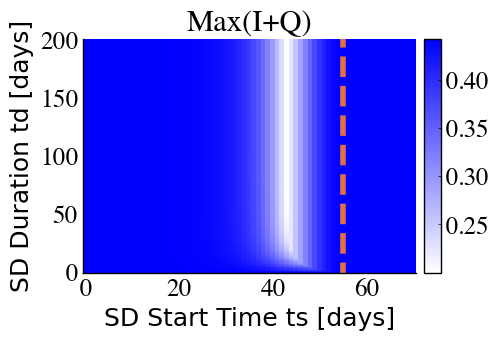

In [7]:
# SIQR model description
function SIQR(du,u,p,t)
    beta, alpha, eta, delta, q, N, t0, T = p
    db = 1-q
    b = beta - beta*db.*sinput(t, t0, T)
    du[1] = -b*u[1]*u[2]/N
    du[2] = b*u[1]*u[2]/N - (alpha+eta)*u[2]
    du[3] = eta*u[2] - delta*u[3]
    du[4] = delta*u[3] + alpha*u[2]
end

# parameters and initial conditions
t0,T = [35, 70]
q, N = [0.1, 1e7]
p    = [0.373, 0.067, 0.067, 0.036, q, N, t0, T]
# define initial values
u0   = [N-83.33, 83.33, 0, 0]
tspn = (0.0, 1e3)

# ode solver
alg = BS3()

p[7:8] = [0., 0.]
prob  = ODEProblem(SIQR, u0, tspn, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sum(sol[2:3,:],dims=1)')]

Trng = 0:200
trng = 0:70
data = zeros(size(Trng,1), size(trng,1))

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[7:8] = [trng[j], Trng[i]]
        prob = ODEProblem(SIQR, u0, tspn, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
        # find and save the peak
        data[i,j] = maximum(sum(sol[2:3,:],dims=1)')/N
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I+Q)")
p1 = plot!(p1, [Int(round(timen))], line=:dash, seriestype="vline", 
    linewidth=4, legend=:false)
p1 = bplot(p1, 22)
savefig(p1, "figures/SIQR_heatmap2.svg")
savefig(p1, "figures/SIQR_heatmap2.png")

# $SIDARTHE$ Model

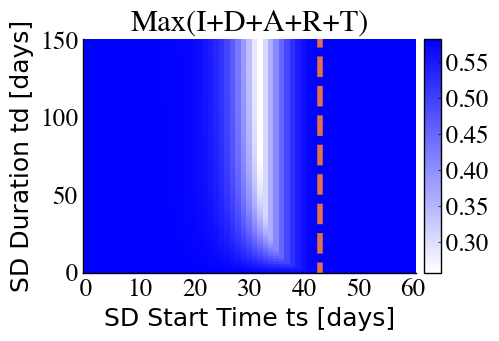

In [8]:
# SIDARTHE model description
function SIDARTHE(du,u,p,t)
    beta = p[1]
    s = p[2:17]
    q, N, t0, T = p[18:21]
    db = 1-q
    beta  = beta - db.*sinput(t, t0, T)
    du[1] = -beta*u[1]*(s[1]*u[2]+s[2]*u[3]+s[3]*u[4]+s[4]*u[5])/N
    du[2] = beta*u[1]*(s[1]*u[2]+s[2]*u[3]+s[3]*u[4]+s[4]*u[5])/N - (s[5]+s[6]+s[7])*u[2]
    du[3] = s[5]*u[2] - (s[8]+s[9])*u[3]
    du[4] = s[6]*u[2] - (s[10]+s[11]+s[12])*u[4]
    du[5] = s[8]*u[3] + s[10]*u[4] - (s[13]+s[14])*u[5]
    du[6] = s[11]*u[4] + s[13]*u[5] - (s[15]+s[16])*u[6]
    du[7] = s[7]*u[2] + s[9]*u[3] + s[12]*u[4] + s[14]*u[5] + s[15]*u[6]
    du[8] = s[16]*u[6]
end

# parameters and initial conditions
t0,T = [25, 50]
q, N = [0.1, 1e7]
p    = [1, 0.570, 0.011, 0.456, 0.011, 0.171, 0.371, 0.125, 0.125, 0.012, 
        0.027, 0.003, 0.034, 0.034, 0.017, 0.017, 0.017, q, N, t0, T]
# define initial values
u0   = [N-83.333, 83.333, 0, 0, 0, 0, 0, 0]
tspn = (0.0, 3e3)

# ode solver
alg = BS3()

p[20:21] = [0., 0.]
prob  = ODEProblem(SIDARTHE, u0, tspn, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sum(sol[2:6,:],dims=1)')]

Trng = 0:150
trng = 0:60
data = zeros(size(Trng,1), size(trng,1))

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[20:21] = [trng[j], Trng[i]]
        prob = ODEProblem(SIDARTHE, u0, tspn, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
        # find and save the peak
        data[i,j] = maximum(sum(sol[2:6,:],dims=1)')/N
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I+D+A+R+T)")
p1 = plot!(p1, [Int(round(timen))], line=:dash, seriestype="vline", 
    linewidth=4, legend=:false)
p1 = bplot(p1, 22)
savefig(p1, "figures/SIDARTHE_heatmap2.png")
savefig(p1, "figures/SIDARTHE_heatmap2.svg")

# Provenance

In [9]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/March/8 12:18"